### Importamos variables

In [2]:
### Manipulación de Datos
import pandas as pd
import numpy as np

### Visualización de Datos
import seaborn as sns
import matplotlib.pyplot as plt

### Tratamiento de datos
from utils.funciones import CategoricalAnalysis, extended_describe

import warnings
warnings.filterwarnings('ignore')

### Importamos datos    

In [3]:
df = pd.read_csv(r"data\raw\Online_Services.csv")
df.head()

,customer_id,phone_service,internet_service,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type
0,0002-ORFBO,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Cable
1,0003-MKNFE,Yes,Yes,No,No,No,No,No,Yes,Yes,Cable
2,0004-TLHLJ,Yes,Yes,No,No,Yes,No,No,No,No,Fiber Optic
3,0011-IGKFF,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Fiber Optic
4,0013-EXCHZ,Yes,Yes,No,No,No,Yes,Yes,No,No,Fiber Optic


|Column Name |	Description| 
|--------------|----------|
|CustomerID	|A unique ID that identifies each customer.|
|Phone Service|	Indicates if the customer subscribes to home phone service with the company: Yes, No|
|Internet Service|	Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.|
|Online Security|	Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No|
|Online Backup|	Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No|
|Device Protection Plan|	Indicates if the customer subscribes to an additional device protection plan: Yes, No|
|Premium Tech Support|	Indicates if the customer subscribes to an additional technical support plan: Yes, No|
|Streaming TV|	Indicates if the customer uses their Internet service to stream television programming: Yes, No|
|Streaming Movies|	Indicates if the customer uses their Internet service to stream movies: Yes, No|
|Streaming Music|	Indicates if the customer uses their Internet service to stream music: Yes, No|
|Internet Type| Indicates the type of the internet user|

In [4]:
print(f'La base de datos a analizar posee {df.shape[0]} filas y {df.shape[1]} columnas')
print(f'\nLas features que tenemos son: {list(df.columns)}')

La base de datos a analizar posee 7043 filas y 11 columnas

Las features que tenemos son: ['customer_id', 'phone_service', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music', 'internet_type']


### Primera exploración

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           7043 non-null   object
 1   phone_service         7043 non-null   object
 2   internet_service      7043 non-null   object
 3   online_security       7043 non-null   object
 4   online_backup         7043 non-null   object
 5   device_protection     7043 non-null   object
 6   premium_tech_support  7043 non-null   object
 7   streaming_tv          7043 non-null   object
 8   streaming_movies      7043 non-null   object
 9   streaming_music       7043 non-null   object
 10  internet_type         5517 non-null   object
dtypes: object(11)
memory usage: 605.4+ KB


In [6]:
df.describe(include="object")

,customer_id,phone_service,internet_service,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,5517
unique,7043,2,2,2,2,2,2,2,2,2,3
top,9995-HOTOH,Yes,Yes,No,No,No,No,No,No,No,Fiber Optic
freq,1,6361,5517,5024,4614,4621,4999,4336,4311,4555,3035


In [7]:
df.isna().sum()

customer_id                0
phone_service              0
internet_service           0
online_security            0
online_backup              0
device_protection          0
premium_tech_support       0
streaming_tv               0
streaming_movies           0
streaming_music            0
internet_type           1526
dtype: int64

In [8]:
df[df['internet_service'] == 'No']

,customer_id,phone_service,internet_service,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type
20,0023-UYUPN,Yes,No,No,No,No,No,No,No,No,NaN
23,0030-FNXPP,Yes,No,No,No,No,No,No,No,No,NaN
24,0031-PVLZI,Yes,No,No,No,No,No,No,No,No,NaN
27,0040-HALCW,Yes,No,No,No,No,No,No,No,No,NaN
28,0042-JVWOJ,Yes,No,No,No,No,No,No,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7026,9970-QBCDA,Yes,No,No,No,No,No,No,No,No,NaN
7028,9972-EWRJS,Yes,No,No,No,No,No,No,No,No,NaN
7032,9975-GPKZU,Yes,No,No,No,No,No,No,No,No,NaN
7033,9975-SKRNR,Yes,No,No,No,No,No,No,No,No,NaN


In [9]:
df[df.duplicated()]

,customer_id,phone_service,internet_service,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type


- La mayoria de nuestros usuarios utiliza fibra óptica como servicio de internet.
- Al tener un customer_id unico para cada, no poseemos duplicados
- Todas nuestras variables son de tipo objeto - booleano.
- Una rápida observación en los valores nulos que poseemos dentro de la columna 'internet_type' si el usuario no posee dicho servicio, no posee tampoco un tipo del mismo. No los vamos a eliminar lo que haremos es colocar otra opción : 'sin servicio' para no perder información.

In [10]:
df['internet_type'].unique()

array(['Cable', 'Fiber Optic', 'DSL', nan], dtype=object)

In [11]:
df.fillna({'internet_type' : 'Sin servicio'}, inplace=True)

In [12]:
df.isna().sum()

customer_id             0
phone_service           0
internet_service        0
online_security         0
online_backup           0
device_protection       0
premium_tech_support    0
streaming_tv            0
streaming_movies        0
streaming_music         0
internet_type           0
dtype: int64

In [13]:
df['internet_type'].unique()

array(['Cable', 'Fiber Optic', 'DSL', 'Sin servicio'], dtype=object)

In [14]:
df[df['internet_service'] == 'No']

,customer_id,phone_service,internet_service,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type
20,0023-UYUPN,Yes,No,No,No,No,No,No,No,No,Sin servicio
23,0030-FNXPP,Yes,No,No,No,No,No,No,No,No,Sin servicio
24,0031-PVLZI,Yes,No,No,No,No,No,No,No,No,Sin servicio
27,0040-HALCW,Yes,No,No,No,No,No,No,No,No,Sin servicio
28,0042-JVWOJ,Yes,No,No,No,No,No,No,No,No,Sin servicio
...,...,...,...,...,...,...,...,...,...,...,...
7026,9970-QBCDA,Yes,No,No,No,No,No,No,No,No,Sin servicio
7028,9972-EWRJS,Yes,No,No,No,No,No,No,No,No,Sin servicio
7032,9975-GPKZU,Yes,No,No,No,No,No,No,No,No,Sin servicio
7033,9975-SKRNR,Yes,No,No,No,No,No,No,No,No,Sin servicio


In [15]:
df.to_csv(path_or_buf=r'data\clean\online_services_clean.csv',index=False)

### Análisis exploratorio

#### Análisis univariante

In [16]:
df = pd.read_csv(r"data\clean\online_services_clean.csv")
df.head()

,customer_id,phone_service,internet_service,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type
0,0002-ORFBO,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Cable
1,0003-MKNFE,Yes,Yes,No,No,No,No,No,Yes,Yes,Cable
2,0004-TLHLJ,Yes,Yes,No,No,Yes,No,No,No,No,Fiber Optic
3,0011-IGKFF,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Fiber Optic
4,0013-EXCHZ,Yes,Yes,No,No,No,Yes,Yes,No,No,Fiber Optic


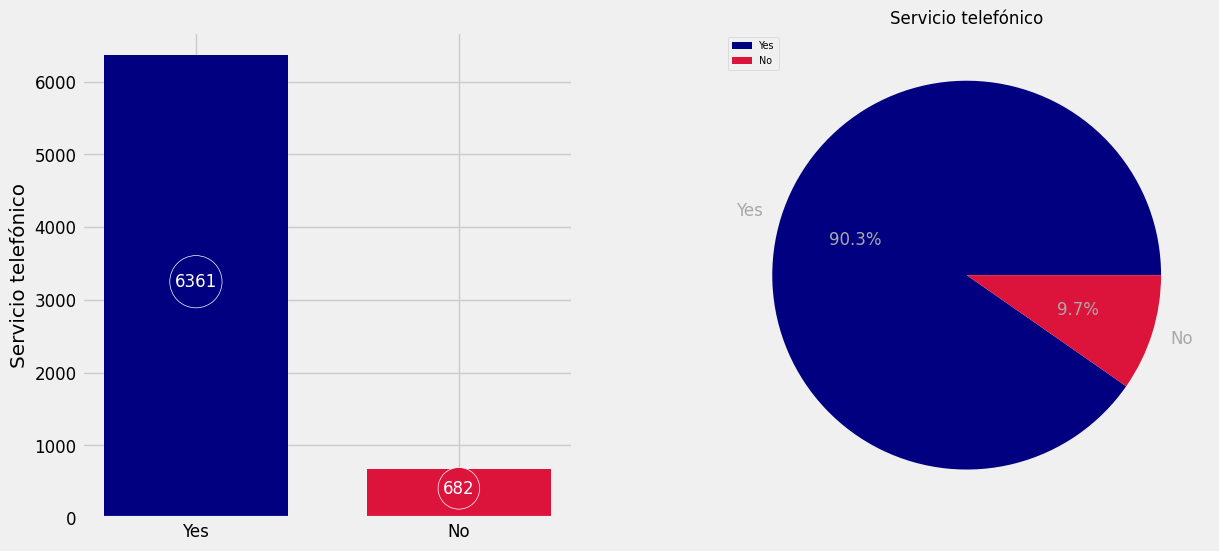

In [17]:
categorical_analyzer = CategoricalAnalysis(df=df)
categorical_analyzer.plot_top_categories(title='Servicio telefónico', labely='Servicio telefónico', column_name='phone_service')

- La gran mayoría de nuestros usuarios utilizan el servicio telefónico que brindamos en un 90,32% del total

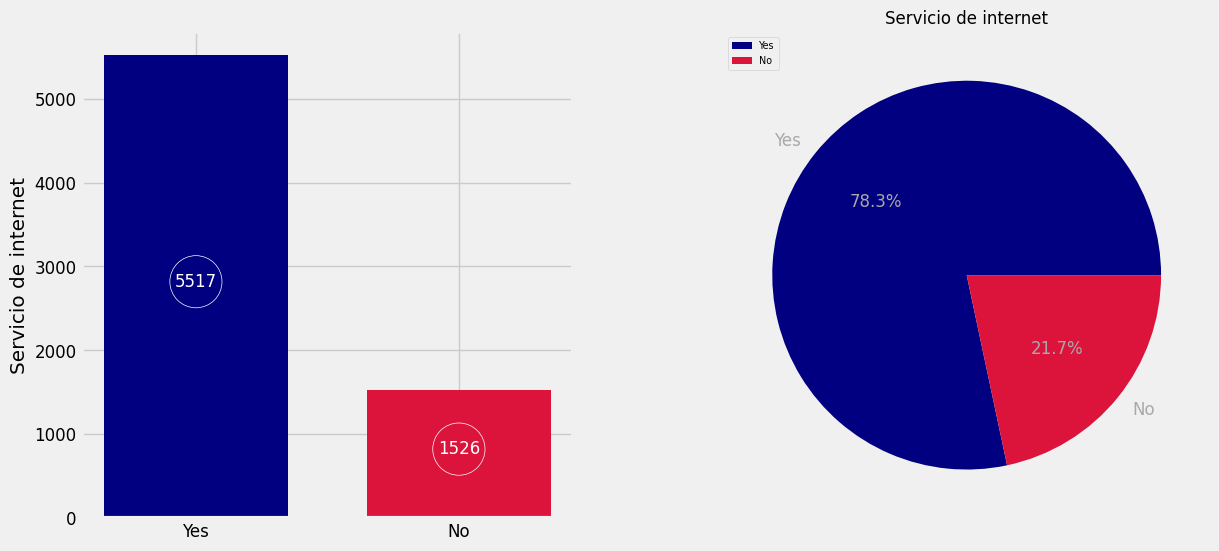

In [18]:
categorical_analyzer.plot_top_categories(title='Servicio de internet', labely='Servicio de internet', column_name='internet_service')

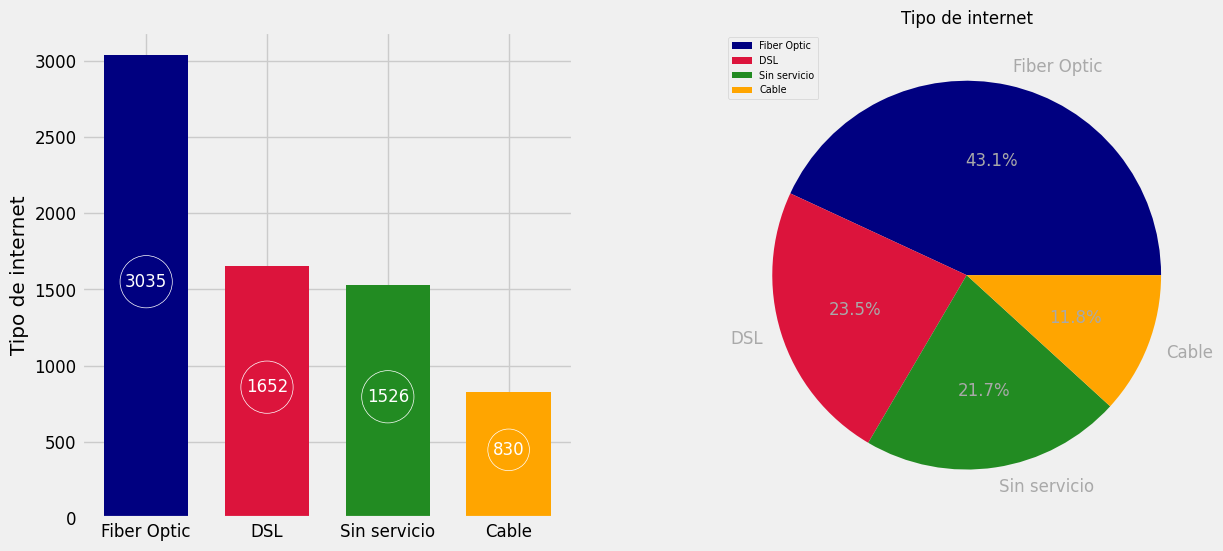

In [19]:
categorical_analyzer.plot_top_categories(title='Tipo de internet', labely='Tipo de internet', column_name='internet_type')

- En un 43,1% del total nuestros uusarios optan por el servicio de internet de tipo fibra óptica siguiendolo el DSL y en tercer lugar contamos con usuarios que no poseen el servicio de internet siendo mayor en porcentaje que los de tipo cable con tan solo 11,8%

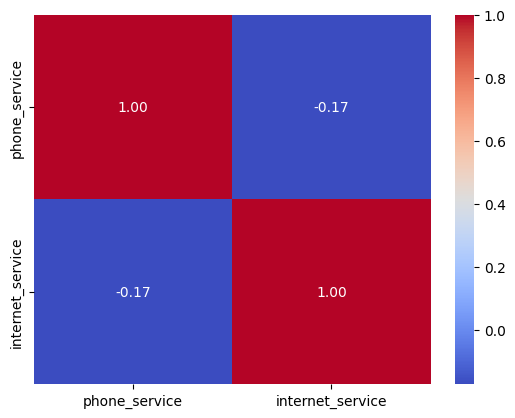

In [20]:
df[['phone_service', 'internet_service']] = df[['phone_service', 'internet_service']].apply(lambda x: x.map({'Yes': 1, 'No': 0}))
sns.heatmap(df[['phone_service', 'internet_service']].corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

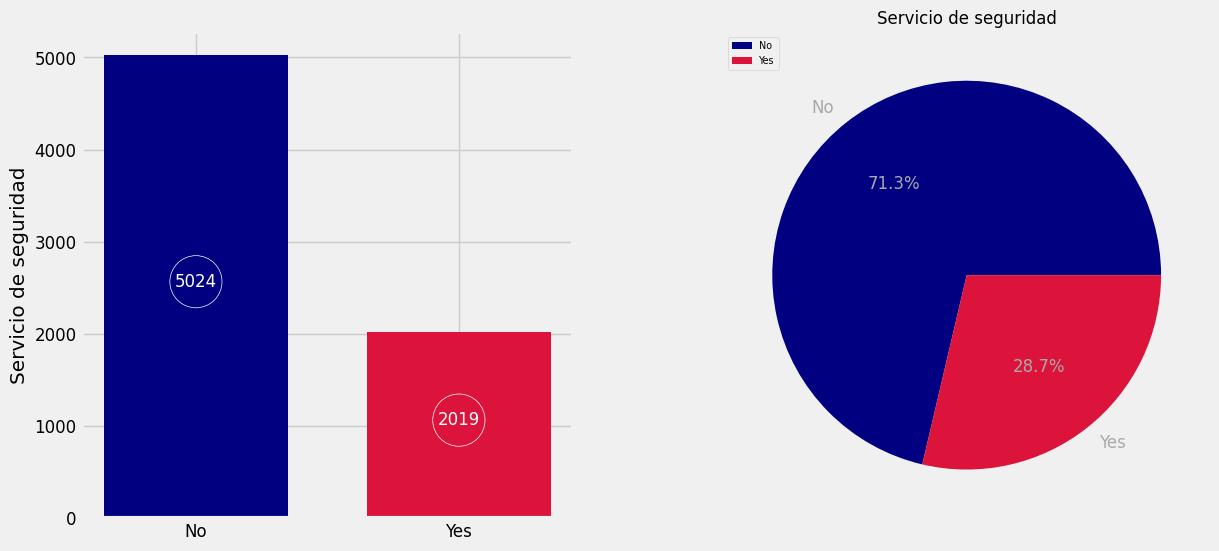

In [21]:
categorical_analyzer.plot_top_categories(title='Servicio de seguridad', labely='Servicio de seguridad', column_name='online_security')

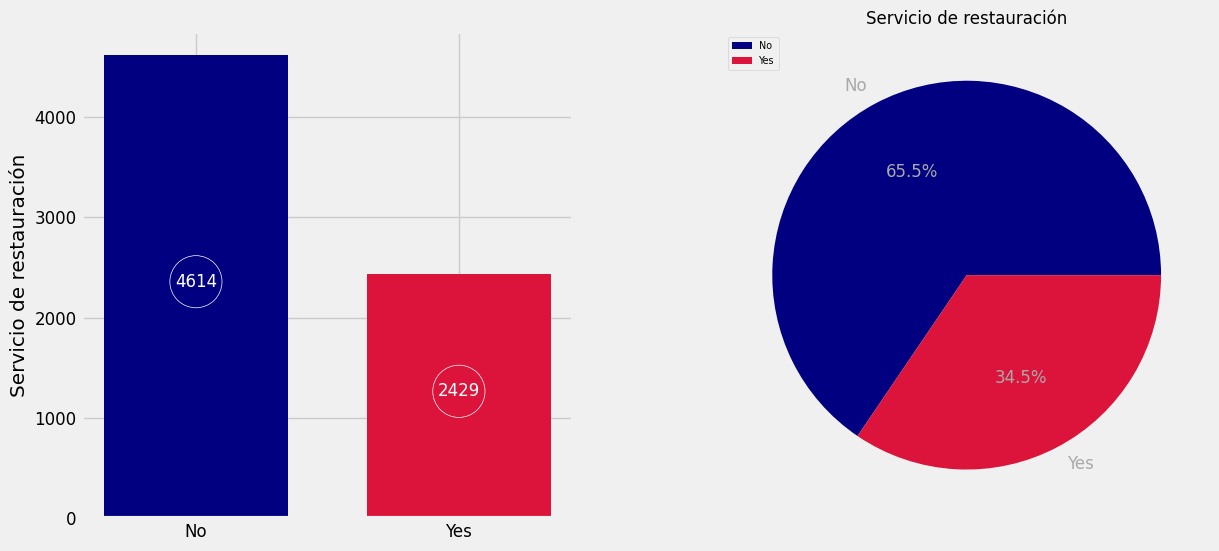

In [22]:
categorical_analyzer.plot_top_categories(title='Servicio de restauración', labely='Servicio de restauración', column_name='online_backup')

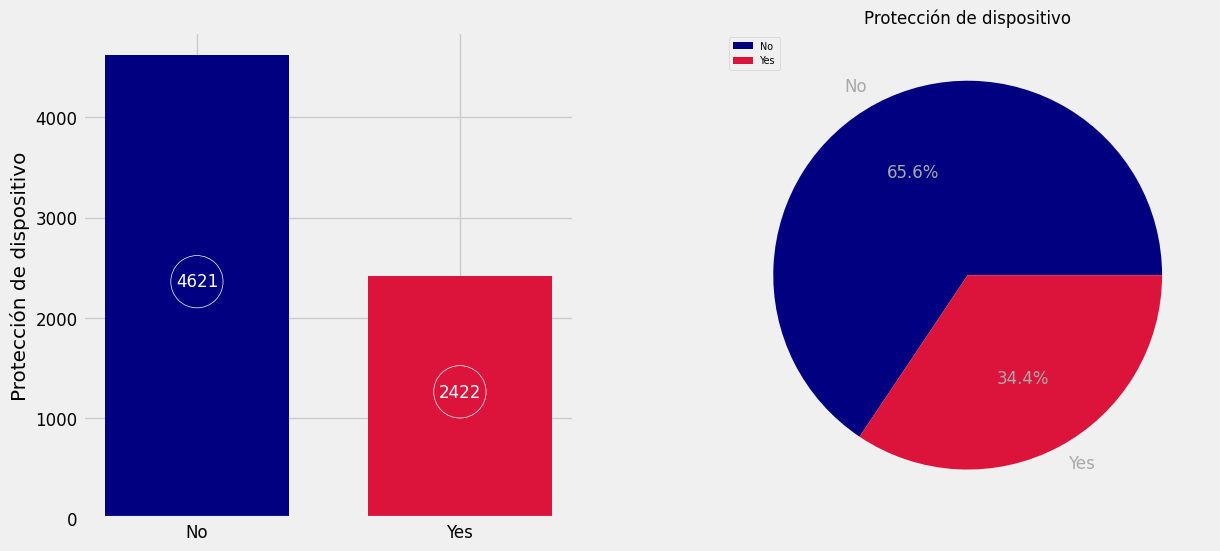

In [23]:
categorical_analyzer.plot_top_categories(title='Protección de dispositivo', labely='Protección de dispositivo', column_name='device_protection')

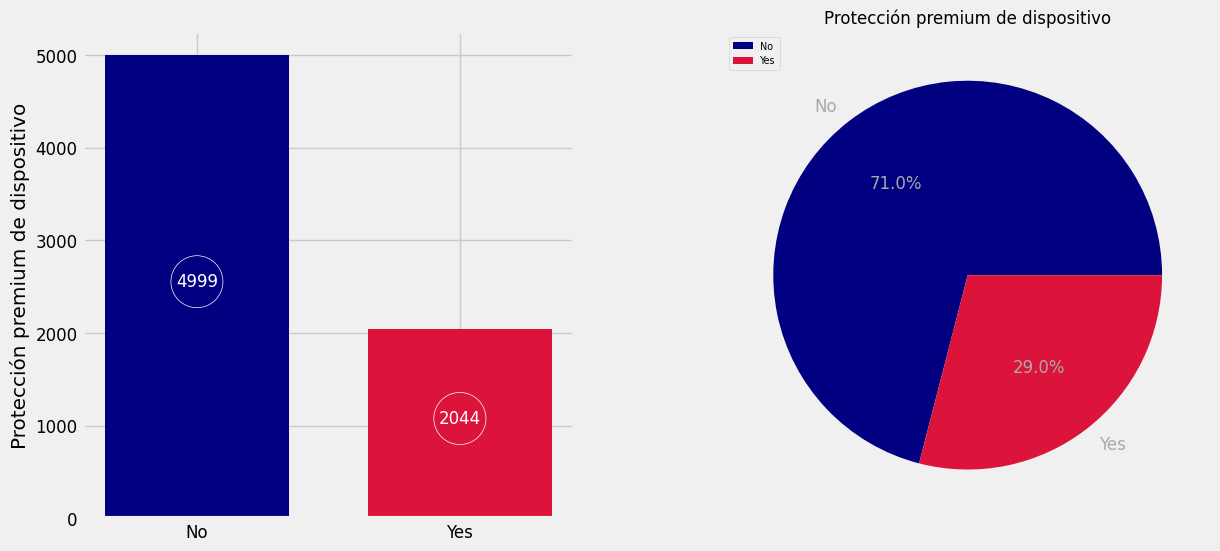

In [24]:
categorical_analyzer.plot_top_categories(title='Protección premium de dispositivo', labely='Protección premium de dispositivo', column_name='premium_tech_support')

- Poseemos que a nivel protección, restauración del servicio/dispositivo solo una pequeña parte lo utiliza. 

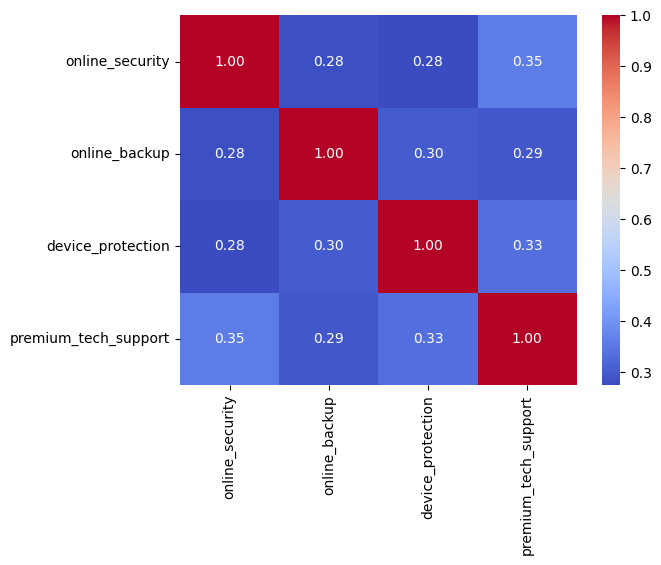

In [25]:
df[['online_security', 'online_backup', 'device_protection', 'premium_tech_support']] = df[['online_security', 'online_backup', 'device_protection', 'premium_tech_support']].apply(lambda x: x.map({'Yes': 1, 'No': 0}))
sns.heatmap(df[['online_security', 'online_backup', 'device_protection', 'premium_tech_support']].corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

- A diferencia de los servicios de streaming los servicios de protección no se encuentran tan relacionados entre sí.

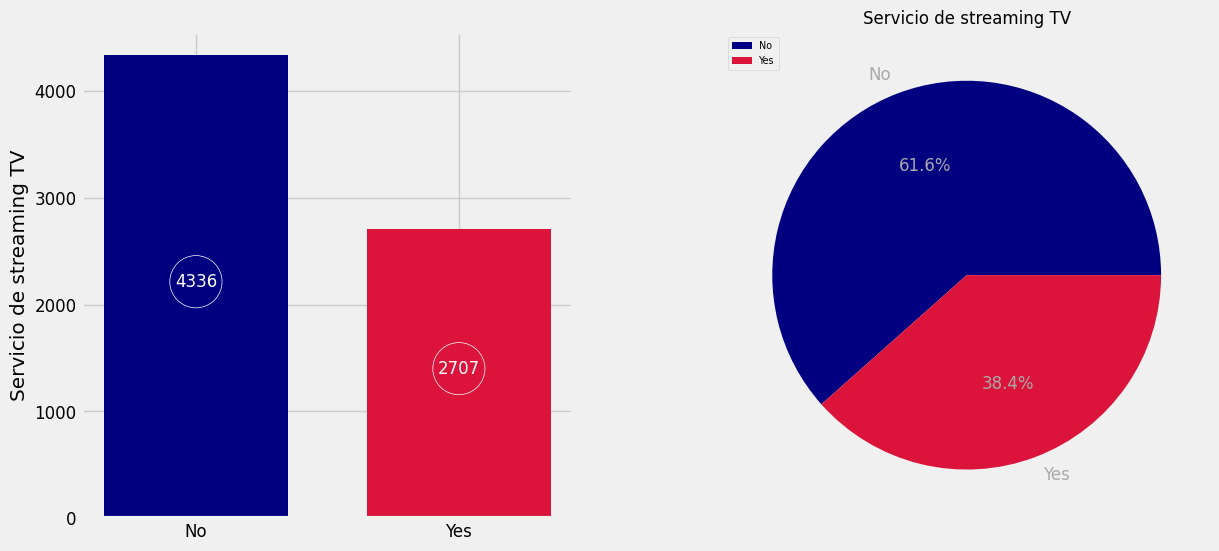

In [26]:
categorical_analyzer.plot_top_categories(title='Servicio de streaming TV', labely='Servicio de streaming TV', column_name='streaming_tv')

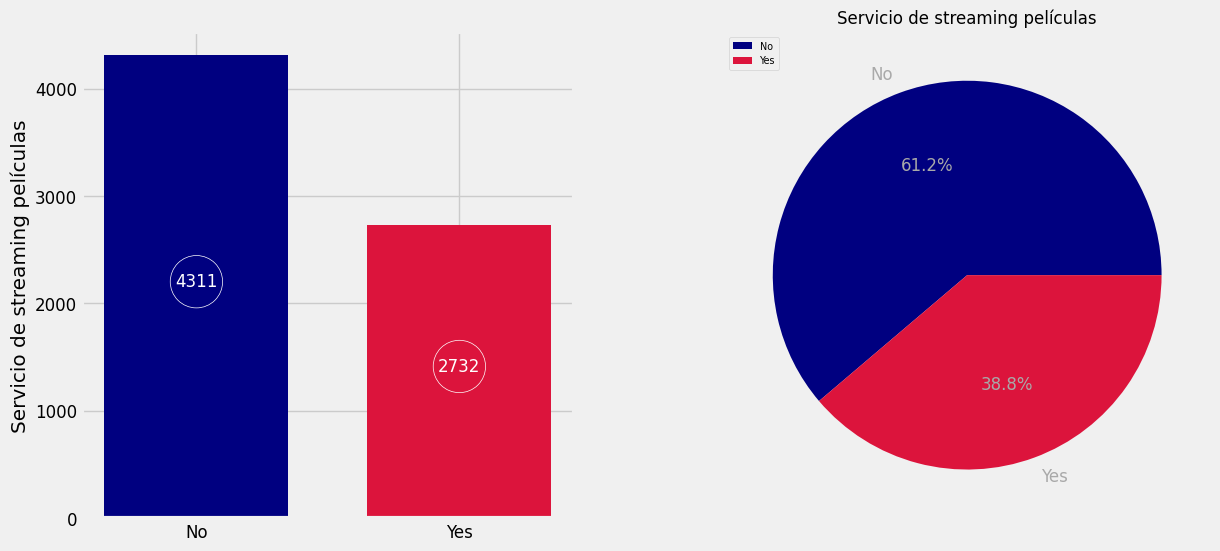

In [27]:
categorical_analyzer.plot_top_categories(title='Servicio de streaming películas', labely='Servicio de streaming películas', column_name='streaming_movies')

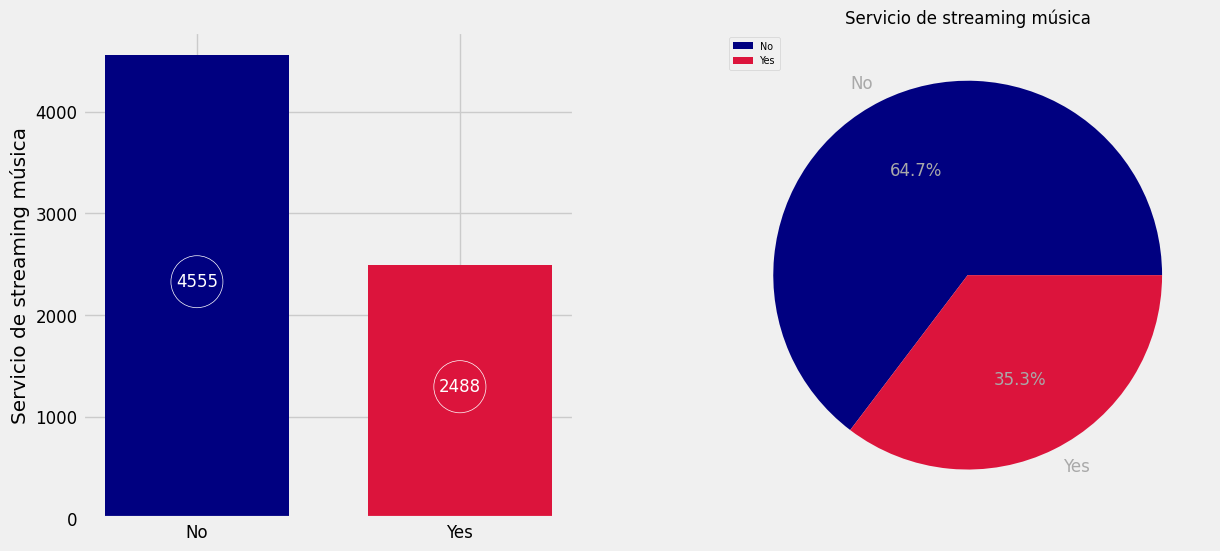

In [28]:
categorical_analyzer.plot_top_categories(title='Servicio de streaming música', labely='Servicio de streaming música', column_name='streaming_music')

- Poseemos que a nivel steaming no supera el 40% de nuestro total.

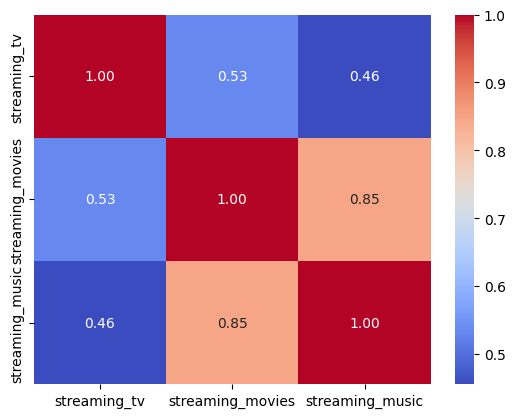

In [29]:
df[['streaming_tv', 'streaming_movies', 'streaming_music']] = df[['streaming_tv', 'streaming_movies', 'streaming_music']].apply(lambda x: x.map({'Yes': 1, 'No': 0}))
sns.heatmap(df[['streaming_tv', 'streaming_movies', 'streaming_music']].corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

- Con alto porcentaje de correlación el 'streaming_movies' con el 'streaming_music', lo que indica que nuestros usuarios uelen adoptar estos servicios más de la mano que con 'streaming_tv'

### Análisis exploratorio basado en el status del cliente.

In [30]:
df1 = pd.read_csv(r"data\clean\status_analysis_clean.csv")
df2 = pd.merge(left = df, right =df1, on ="customer_id")

In [31]:
df2.head()

,customer_id,phone_service,internet_service,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type,satisfaction_score,cltv,customer_status,churn_label,churn_category,churn_group,razon_abandono
0,0002-ORFBO,1,1,0,1,0,1,1,0,0,Cable,3,2205,Stayed,No,Not Applicable,"[60, 70)",Competitor had better devices
1,0003-MKNFE,1,1,0,0,0,0,0,1,1,Cable,5,5414,Stayed,No,Not Applicable,"[60, 70)",Competitor had better devices
2,0004-TLHLJ,1,1,0,0,1,0,0,0,0,Fiber Optic,1,4479,Churned,Yes,Competitor,"[70, 80)",Competitor had better devices
3,0011-IGKFF,1,1,0,1,1,0,1,1,0,Fiber Optic,1,3714,Churned,Yes,Dissatisfaction,"[90, 100)",Product dissatisfaction
4,0013-EXCHZ,1,1,0,0,0,1,1,0,0,Fiber Optic,1,3464,Churned,Yes,Dissatisfaction,"[60, 70)",Network reliability



---

### **1️⃣ Hipótesis 1: Relación entre la cantidad de servicios y el abandono** 📊  
🔍 **Análisis**: Evaluamos si los clientes que tienen más servicios contratados **abandonan menos** que aquellos con menos servicios.  

---  


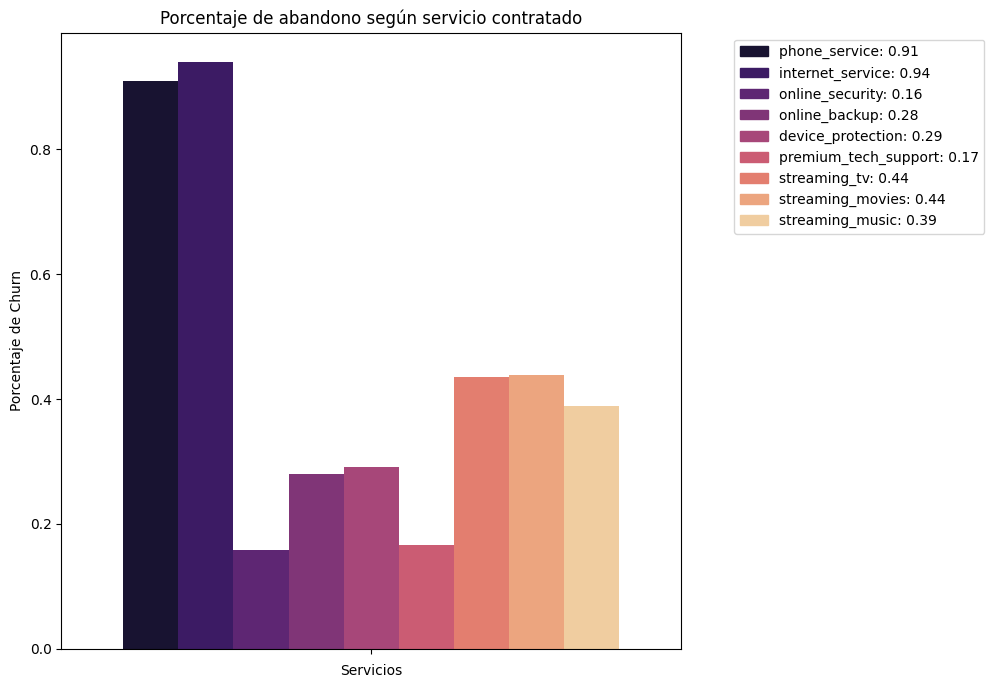

In [32]:
import matplotlib.patches as mpatches

# Crear columnas binarias para cada servicio (1 si lo tiene, 0 si no lo tiene)
servicios = df2.loc[: , 'phone_service' : 'streaming_music']
df2['total_servicios'] = servicios.sum(axis=1)

# Gráfico 1: Churn por tipo de servicio
plt.figure(figsize=(8,8))
servicio_churn = df2[df2['churn_label'] == 'Yes'][servicios.columns].mean()  # Porcentaje de churn en cada servicio
ax = sns.barplot(hue=servicio_churn.index, y=servicio_churn.values, palette="magma", width=0.8)

# Crear etiquetas personalizadas para la leyenda
patches = [mpatches.Patch(color=bar.get_facecolor(), label=f"{servicio}: {valor:.2f}") 
           for servicio, bar, valor in zip(servicio_churn.index, ax.patches, servicio_churn.values)]

# Agregar la leyenda con colores correctos
plt.legend(handles=patches, loc='upper right', bbox_to_anchor=(1.5, 1))

plt.title("Porcentaje de abandono según servicio contratado")
plt.xlabel("Servicios")
plt.xticks(rotation=45)
plt.ylabel("Porcentaje de Churn")
plt.show()

- 📊 Notamos que ciertos servicios como **internet** 🌐 y **teléfono** 📞 presentan un mayor porcentaje de abandono en comparación con otros. Habría que tomar acción sobre estos servicios y analizar qué está sucediendo con los mismos debido a su alto porcentaje de churn, ya que **son los únicos que superan el 90%**, mientras que el resto no llega al 50%.

In [ ]:
# ¿ Cuántos más servicios, menos abandonan?
df2.groupby('churn_label')['total_servicios'].value_counts().unstack()

total_servicios,1,2,3,4,5,6,7,8,9
churn_label,,,,,,,,,
No,1454,347,484,549,602,582,536,399,221
Yes,145,333,356,303,287,235,141,56,13


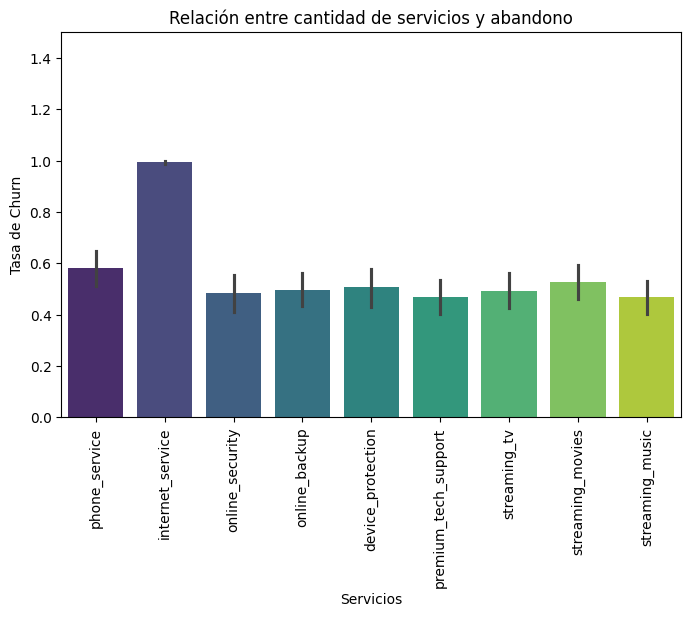

In [35]:
# Seleccionar solo las columnas de servicios de streaming
servicios = ['phone_service', 'internet_service', 'online_security', 'online_backup',
             'device_protection', 'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music']

# Calcular la tasa de churn promedio para cada servicio
services_churn = df2.groupby(servicios)['churn_label'].apply(lambda x: (x == 'Yes').mean()).reset_index()

# Transformar el DataFrame para que las columnas sean categorías en X
services_churn = services_churn.melt(id_vars=['churn_label'], var_name="Servicio", value_name="Tasa de Churn")

# Crear el gráfico de barras
plt.figure(figsize=(8,5))
sns.barplot(data=services_churn, x="Servicio", y="Tasa de Churn", palette="viridis", legend=False)

# Personalización del gráfico
plt.title("Relación entre cantidad de servicios y abandono")
plt.xlabel("Servicios")
plt.ylabel("Tasa de Churn")
plt.ylim(0, 1.5)
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()


| total_servicios | No   | Yes | Tasa de Churn (%) |
|---------------|------|------|------------------|
| 1             | 1454 | 145  | (145 / (1454 + 145)) * 100 = **9.07%** |
| 2             | 347  | 333  | (333 / (347 + 333)) * 100 = **48.98%** |
| 3             | 484  | 356  | (356 / (484 + 356)) * 100 = **42.39%** |
| 4             | 549  | 303  | (303 / (549 + 303)) * 100 = **35.55%** |
| 5             | 602  | 287  | (287 / (602 + 287)) * 100 = **32.29%** |
| 6             | 582  | 235  | (235 / (582 + 235)) * 100 = **28.76%** |
| 7             | 536  | 141  | (141 / (536 + 141)) * 100 = **20.82%** |
| 8             | 399  | 56   | (56 / (399 + 56)) * 100 = **12.31%** |
| 9             | 221  | 13   | (13 / (221 + 13)) * 100 = **5.56%** |


**📊 Conclusión:**
- La tasa de churn es **más alta en clientes con 2 y 3 servicios** (alrededor del **49% y 42%**).
- A medida que aumentan los servicios contratados, la tasa de churn **disminuye progresivamente**.
- Los clientes con **9 servicios casi no abandonan** (solo **5.56%**).  

Esto indica que los clientes con pocos servicios o con solo algunos específicos tienden a abandonar más, mientras que quienes contratan más servicios son más leales. 🚀


---

📌 **Conclusión sobre los gráficos de churn**  

Para comprender el impacto del churn en los servicios contratados, ambos gráficos ofrecen perspectivas complementarias:  

✅ **El primer gráfico** permite identificar **qué servicios específicos tienen mayores tasas de abandono**, ayudando a detectar cuáles requieren mejoras o estrategias de retención.  

✅ **El segundo gráfico** profundiza en **cómo la combinación de servicios influye en la tasa de churn**, revelando patrones más complejos en el comportamiento de los clientes.  

**En conjunto, estos análisis proporcionan una visión más completa**, permitiendo no solo identificar servicios con alta fuga, sino también entender si ciertas combinaciones agravan el problema. 


-----


> En el segundo gráfico, esas **9 barras representan cada servicio**, pero no de manera individual como en el primer gráfico.  
> 
> **¿Qué significa cada barra en el segundo gráfico?**  
> 📊 **Cada barra representa la tasa de churn promedio de los clientes que tienen ese servicio, considerando la combinación de servicios que poseen.**  
>
> ##### **Ejemplo para entenderlo mejor**  
> Imagina que tenemos 3 clientes con diferentes servicios:  
>
> | Cliente | Internet | Streaming TV | Seguridad Online | Churn |
> |---------|---------|--------------|------------------|-------|
> | A       | ✅      | ❌           | ✅               | Sí (1) |
> | B       | ✅      | ✅           | ❌               | Sí (1) |
> | C       | ❌      | ✅           | ✅               | No (0) |
>
>
>
> 1. Para calcular la **tasa de churn del servicio "Internet"**, miramos a los clientes que lo tienen (`A y B`). De ellos, **el 100% hizo churn**, así que su barra sería 1.0.  
> 2. Para el servicio **"Streaming TV"**, miramos a los clientes que lo tienen (`B y C`). Solo `B` hizo churn (50%), entonces su barra sería 0.5.  
> 3. Para **"Seguridad Online"**, de los clientes que lo tienen (`A y C`), solo `A` hizo churn (50%), así que su barra sería 0.5.  
>
> ##### **Diferencia clave con el primer gráfico**  
> - **Primer gráfico:** Mira el churn de cada servicio de forma **individual** (sin importar qué otros servicios tiene el cliente).  
> - **Segundo gráfico:** Calcula el churn **promedio** para cada servicio **teniendo en cuenta la combinación de servicios** de cada cliente.  
>
> Por eso, las barras en el segundo gráfico pueden ser diferentes al primer gráfico.

----

##### **¿Qué servicios logran la mayor deserción en su combinación?**

In [53]:
# Convertir churn_label a valores numéricos (Yes -> 1, No -> 0)
df2["churn_numeric"] = df2["churn_label"].map({"Yes": 1, "No": 0})

# Crear una nueva columna combinando los servicios activados en cada fila
df2["comb_servicios"] = df2[servicios].astype(str).agg('-'.join, axis=1)

# Calcular el churn promedio por cada combinación de servicios
churn_por_comb = df2.groupby("comb_servicios")["churn_numeric"].mean().reset_index()

# Filtrar solo las combinaciones con alto churn (>97%)
churn_por_comb = churn_por_comb[churn_por_comb["churn_numeric"] > 0.97]

# Ordenar de mayor a menor churn
churn_por_comb = churn_por_comb.sort_values(by="churn_numeric", ascending=False)

# Mostrar las combinaciones más críticas
churn_por_comb


,comb_servicios,churn_numeric
12,0-1-0-0-1-0-0-0-1,1.0
13,0-1-0-0-1-0-0-1-0,1.0
19,0-1-0-0-1-1-0-1-0,1.0
27,0-1-0-1-0-0-1-0-1,1.0
44,0-1-0-1-1-1-1-1-0,1.0
47,0-1-1-0-0-0-0-1-0,1.0
62,0-1-1-0-1-1-0-0-1,1.0
94,1-1-0-0-0-0-1-0-1,1.0
109,1-1-0-0-1-0-1-0-1,1.0
124,1-1-0-1-0-0-1-0-1,1.0


In [57]:
# Lista de nombres de los servicios en orden
servicios = ['phone_service', 'internet_service', 'online_security', 'online_backup',
             'device_protection', 'tech_support_premiun', 'streaming_tv', 'streaming_movies', 'streaming_music']

# Función para mapear cada combinación de 0s y 1s a los nombres de los servicios
def decode_services(comb_str):
    valores = list(map(int, comb_str.split('-')))  # Convertir string a lista de enteros
    servicios_activos = [serv for serv, val in zip(servicios, valores) if val == 1]  # Filtrar los que son 1
    return ", ".join(servicios_activos)  # Unir en un solo string

# Aplicar la función a cada combinación en churn_por_comb
churn_por_comb["Servicios_Activos"] = churn_por_comb["comb_servicios"].apply(decode_services)

# Mostrar los resultados con los nombres de los servicios
print(churn_por_comb[["Servicios_Activos", "churn_numeric"]].to_string())


                                                                                                     Servicios_Activos  churn_numeric
12                                                                internet_service, device_protection, streaming_music            1.0
13                                                               internet_service, device_protection, streaming_movies            1.0
19                                         internet_service, device_protection, tech_support_premiun, streaming_movies            1.0
27                                                      internet_service, online_backup, streaming_tv, streaming_music            1.0
44            internet_service, online_backup, device_protection, tech_support_premiun, streaming_tv, streaming_movies            1.0
47                                                                 internet_service, online_security, streaming_movies            1.0
62                         internet_service, online_security, 

##### **🔎 Conclusión sobre los Servicios Activos**  
📌 **Observación clave:** Todas las combinaciones de servicios listadas tienen un churn del **100%** (es decir, todos los clientes con estas combinaciones se dieron de baja).  

🔹 **Internet Service aparece en todas las combinaciones** → Indica que los clientes con este servicio tienen un mayor riesgo de abandono.  
🔹 **Servicios como Device Protection, Streaming TV y Streaming Music son recurrentes** → Puede significar que los clientes que contratan múltiples servicios de entretenimiento o protección no encuentran suficiente valor en ellos.  
🔹 **La combinación con Phone Service también muestra alto churn** → Esto sugiere que tener tanto teléfono como internet no garantiza la permanencia del cliente.  

##### **📊 Recomendaciones**  
✅ **Revisar la calidad del servicio de internet** y sus costos, ya que es un factor común en el abandono.  
✅ **Analizar el valor de los paquetes de servicios** para entender si los clientes perciben que el costo no justifica el beneficio.  
✅ **Realizar encuestas o entrevistas** para identificar qué problemas enfrentan estos clientes antes de cancelar el servicio.  

📢 **Conclusión general:** Algunas combinaciones de servicios presentan un abandono extremadamente alto, lo que sugiere que ciertos paquetes pueden no estar cumpliendo con las expectativas de los clientes. Es necesario investigar si esto se debe a precio, calidad o falta de personalización de la oferta. 



---

### **2️⃣ Hipótesis 2: Relación entre los servicios de streaming y el churn** 🎬🎵📺  
🔍 **Análisis**: Investigamos si los clientes que tienen **servicios de streaming** (TV, películas, música) **abandonan más o menos** que los que no los tienen.  

---

   streaming_tv  streaming_movies  streaming_music  churn_label
0             0                 0                0     0.215965
1             0                 0                1     0.646465
2             0                 1                0     0.533333
3             0                 1                1     0.278020
4             1                 0                0     0.299320
5             1                 0                1     0.718750
6             1                 1                0     0.448148
7             1                 1                1     0.269461


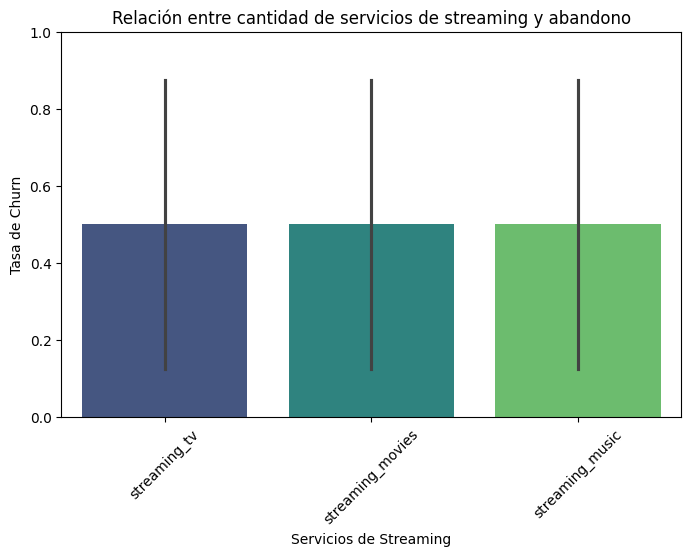

In [81]:
# Seleccionar solo las columnas de servicios de streaming
servicios_streaming = ['streaming_tv', 'streaming_movies', 'streaming_music']

# Calcular la tasa de churn promedio para cada servicio
streaming_churn = df2.groupby(servicios_streaming)['churn_label'].apply(lambda x: (x == 'Yes').mean()).reset_index()

print(streaming_churn)

# Transformar el DataFrame para que las columnas sean categorías en X
streaming_churn = streaming_churn.melt(id_vars=['churn_label'], var_name="Servicio", value_name="Tasa de Churn")

# Crear el gráfico de barras
plt.figure(figsize=(8,5))
sns.barplot(data=streaming_churn, x="Servicio", y="Tasa de Churn", palette="viridis", legend=False)

# Personalización del gráfico
plt.title("Relación entre cantidad de servicios de streaming y abandono")
plt.xlabel("Servicios de Streaming")
plt.ylabel("Tasa de Churn")
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


- **Cada fila representa un grupo de clientes que tienen ciertos servicios de streaming activados (`1`) o no (`0`)**.
- **La última columna (`churn_label`) muestra el porcentaje de churn en ese grupo**.

🔹 **Ejemplo de lectura:**
🔸 La fila `1` (`0,0,1`) representa clientes que **solo tienen `streaming_music` activado**.  
🔹 El **64.6% de ellos hizo churn** (abandonó el servicio).  

🔸 La fila `7` (`1,1,1`) representa clientes que **tienen los tres servicios activados**.  
🔹 Solo **26.9% hizo churn**, lo que sugiere que los clientes con más servicios contratados tienen menor tasa de abandono.

---

##### **Conclusión**

Los clientes que **no tienen ningún servicio de streaming** (fila 0) presentan un churn del **21.6%**, mientras que aquellos que sí tienen **alguna combinación de streaming** muestran variaciones importantes en la tasa de abandono:  

✅ **Tener solo Streaming Music** aumenta el churn al **64.6%**, lo que indica que los clientes que contratan solo este servicio tienen un alto riesgo de abandono.  
✅ **Tener solo Streaming Movies** también eleva el churn al **53.3%**, aunque menos que solo Streaming Music.  
✅ **Tener solo Streaming TV** mantiene un churn moderado de **29.9%**.  
✅ **Tener múltiples servicios de streaming no garantiza una reducción del churn**:  
   - **Streaming TV + Streaming Music** → **71.9%** (el más alto de todos).  
   - **Streaming TV + Streaming Movies** → **44.8%**.  
   - **Los tres servicios juntos tienen el churn más bajo de todas las combinaciones (26.9%)**, lo que sugiere que los clientes que usan todos los servicios de streaming están más satisfechos.  

💡 **Contratar un solo servicio de streaming (especialmente música) está fuertemente asociado con un mayor churn**.  
💡 **Los clientes que contratan todos los servicios de streaming parecen más comprometidos y menos propensos a cancelar**.  
💡 **El alto churn de quienes tienen solo streaming music o solo streaming movies sugiere que estos servicios pueden no ser suficientemente atractivos cuando se contratan individualmente**.  

**Recomendación:** Evaluar la percepción de valor de los paquetes de streaming y considerar estrategias como descuentos en combos o mejorar la oferta individual de Streaming Music y Movies para retener a estos clientes. 

